### 

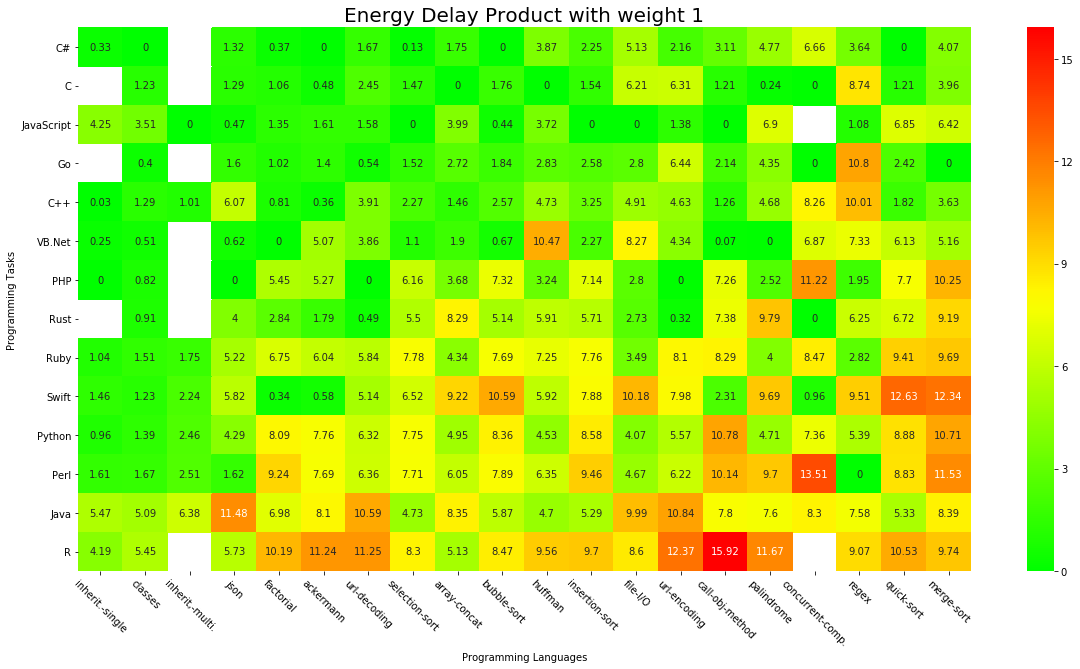

In [72]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.colors as mcolors
from os import environ

langaugesEDP=[""  for x in xrange(280)]
ProgrammingLanguages=[""  for x in xrange(280)]
ProgrammingTasks=[""  for x in xrange(280)]
langaugeArray=['C#', 'C', 'C++', 'Go', 'JavaScript', 'Java', 'Perl', 'PHP', 'Python', 'R', 'Ruby', 'Rust', 'Swift', 'VB.Net']
taskArray=['ackermann','array-concat', 'call-obj-method', 'classes','concurrent-comp.','factorial','file-I/O', 'huffman', 'inherit,-multi.','inherit.-single','json','palindrome','regex','bubble-sort','insertion-sort','merge-sort','quick-sort','selection-sort','url-decoding','url-encoding']
#taskArray=['inherit-multi', 'inherit-single', 'classes','json', 'factorial','ackermann', 'url-decoding', 'selection','array-concat', 'bubble', 'huffman', 'insertion', 'file I/O','url-encoding','call-obj-method','palindrome','concur.-com.' ,'regex','quick-sort','merge-sort']
index = environ['myvar']
counter=0      
with open('/home/sgeorgiou/GitHub/Rosetta_Code_Research_MSR/Reports/Experiment_Data_Wed_Oct_11_11:24:29_UTC_2017/GraphData/Normalized_EDP_'+ index +'.txt') as f:
    for line in f:
        line = line.replace(":","")
        line = line.replace(",","")
        data = re.split('\s+', line)
        data.pop(0)
        #print(data)
        for i in range(14):
            langaugesEDP[counter] = float(data[i])
            counter += 1
            
correctlySortedEDP=[[0 for x in range(20)] for y in range(14)] 
for i in range(14):
    for j in range (20):
        correctlySortedEDP[i][j] = langaugesEDP[i+(j*14)]
 

#Creating a dummy array that includes all the average EDP for languages
dummyArray=[0 for x in range(14)]
dummyNotSortedArray=[0 for x in range(14)]
divideWith=0
average=0
for i in range(14):
    for j in range (20):
        if correctlySortedEDP[i][j] != -1:
            average += correctlySortedEDP[i][j]
            divideWith += 1
    #print(langaugeArray[i]," avg. ",  average/divideWith , " and dividing with ", divideWith)
    dummyArray[i]= average/divideWith
    divideWith=0
    average=0
for k in range(14):
    dummyNotSortedArray[k] = dummyArray[k]
dummyArray.sort()

#Here we reodreder to EDP results based on the lowest avereage EDP for the languages    
total=0
average=0
divideWith=0
reorderindSortedEDPList=[[0 for x in range(20)] for y in range(14)]   
for i in range(14):
    for j in range (20):
        if correctlySortedEDP[i][j] != -1:
            total += correctlySortedEDP[i][j]
            divideWith += 1
    average = total/divideWith
    #print("Programming Language ",langaugeArray[i], " average score in EDP ",average, " and divided with ", divideWith )
    for k in range(14):
        if dummyArray[k] == average:
            for l in range(20):
               reorderindSortedEDPList[k][l] = correctlySortedEDP[i][l]
    total=0
    divideWith=0   

#Creating a dummy array that includes all the average EDP for tasks
anotherDummyArray=[0 for x in range(20)]
anotherNotSortedDummyArray=[0 for x in range(20)]
average=0
divideWith=0
for i in range(20):
    for j in range(14):
        if  reorderindSortedEDPList[j][i] != -1:
            average += reorderindSortedEDPList[j][i]
            divideWith += 1
    #print("Task name:", taskArray[i], " and average is ",average/divideWith)
    anotherDummyArray[i] = average/divideWith
    divideWith = 0
    average=0   
for k in range(20):
    anotherNotSortedDummyArray[k] = anotherDummyArray[k]
anotherDummyArray.sort()

#Here we reodreder to EDP results based on the lowest avereage EDP for the tasks
AgainReorderindSortedEDPList=[[0 for x in range(20)] for y in range(14)] 
average=0
divideWith=0
for i in range(20):
    for j in range (14):
        if  reorderindSortedEDPList[j][i] != -1:
            average += reorderindSortedEDPList[j][i]
            divideWith +=1
    average /= divideWith
    for k in range(20):
        if anotherDummyArray[k] == average:
            for l in range(14):
               AgainReorderindSortedEDPList[l][k] = reorderindSortedEDPList[l][i]
    average=0
    divideWith=0
    
#Now reoder the programming langauges regarding the average EDP
sortedProgrammingLanguagesBasedOnAverage=['' for x in range(14)]
for i in range(14):
    for j in range(14):
        if dummyArray[i] == dummyNotSortedArray[j]:
            sortedProgrammingLanguagesBasedOnAverage[i] = langaugeArray[j]

#Now reoder the programming langauges regarding the average EDP
sortedTasksBasedOnAverage=['' for x in range(20)]
for i in range(20):
    for j in range(20):
        if anotherDummyArray[i] == anotherNotSortedDummyArray[j]:
            sortedTasksBasedOnAverage[i] = taskArray[j]
    
for i in range(14):
    for j in range (20):
        if AgainReorderindSortedEDPList[i][j] == -1:
            #AgainReorderindSortedEDPList[i][j] = 0
            AgainReorderindSortedEDPList[i][j] = np.nan
            
            
ProgrammingLanguagesReIndex=['C#','C', 'JavaScript','Go', 'C++','VB.NET', 'PHP', 'Rust' , 'Ruby', 'Python', 'Perl', 'Swift', 'Java', 'R']
cmap1 = mcolors.LinearSegmentedColormap.from_list("n",['#00FF00','#12FF00','#24FF00','#35FF00','#47FF00','#58FF00','#6AFF00','#7CFF00','#8DFF00','#9FFF00','#B0FF00','#C2FF00','#D4FF00','#E5FF00','#F7FF00','#FFF600','#FFE400','#FFD300','#FFC100','#FFAF00','#FF9E00','#FF8C00','#FF7B00','#FF6900','#FF5700','#FF4600','#FF3400','#FF2300','#FF1100','#FF0000',
])
#'#FFFFFF',
plt.figure(figsize=(20, 10))
df = pd.DataFrame( AgainReorderindSortedEDPList, index=sortedProgrammingLanguagesBasedOnAverage, columns=sortedTasksBasedOnAverage)
df.columns.name = 'Programming Languages'
df.columns.font=20
df.index.name = 'Programming Tasks'
mask = df.isnull()
sns.heatmap(df, annot=True, fmt="g", cmap=cmap1, mask=mask)

plt.xticks(rotation=-45)
plt.title("Energy Delay Product with weight "+  index +"",fontsize= 20)
plt.savefig('Normalized_Results_EDP_'+  index +'_HeatMap_Logarithmic_Function.png')

plt.show()

In [46]:
?df?dataframe